In [1]:
import neptune.new as neptune
from utils import *
import numpy as np

import seaborn as sns


import ipywidgets as ipw
from ipywidgets.embed import embed_minimal_html

from matplotlib import pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from tqdm import tqdm

%matplotlib inline

def figures_to_html(figs, filename="dashboard.html"):
    dashboard = open(filename, 'w')
    dashboard.write("<html><head></head><body>" + "\n")
    for fig in figs:
        inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
        dashboard.write(inner_html)
    dashboard.write("</body></html>" + "\n")
    
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

2023-03-06 16:23:24.343643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 16:23:25.113865: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-06 16:23:26.134490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/insane/.cache/pypoetry/virtualenvs/3d-reconstruction-mtYbvF5z-py3.10/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-06 16:23:26.134549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64]

# Smart Initialization

In [2]:
with neptune.get_project(
    name='rahatzamancse/3DMPE-angle-noise', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
) as project:
# with neptune.get_project(
#     name='rahatzamancse/MPSE-on-LMNET-dataset', 
#     api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
# ) as project:

    # Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
    run_table_df = project.fetch_runs_table(
        owner='rahatzamancse',
        tag='smart_init'
        # tag='noise'
    ).to_pandas()

run_table_df.columns

https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/metadata


Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'sys/trashed',
       'GT/Points per perspective list', 'Results/Alignment/ICP/EMDx100',
       'Results/Alignment/ICP/chamfer_distancex100',
       'Results/Alignment/ICP/error', 'Results/Baseline/4point_ICP_Chamfer',
       'Results/Baseline/4point_ICP_EMD', 'Results/Final Cost',
       'Results/Final Individual Cost',
       'Results/computation history/Actual Iterations Run',
       'Results/computation history/Conclusion',
       'Results/computation history/costs',
       'Results/computation history/grads', 'Results/computation history/lrs',
       'Results/computation history/steps', 'parameters/ANGLE_RANGE/END',
       'parameters/ANGLE_RANGE/START', 'parameters/DATASET',
       'parameters/DATA_DIR', 'parameters/INITIAL_EMBED

In [3]:
cols = [
    'Results/Baseline/4point_ICP_EMD',
    'Results/Alignment/ICP/EMDx100',
    'Results/Baseline/4point_ICP_Chamfer',
    'Results/Alignment/ICP/chamfer_distancex100',
    'Results/Final Cost',
    
    'parameters/NOISE_AMOUNT',
    'parameters/NOISE_AMP',
    'parameters/ANGLE_RANGE/END',

    'parameters/DATASET',
    
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'parameters/PROJECTION/PROJ_TYPE',
    
    'sys/id',
    'runtime',
    'sys/tags'
]
colnames = [
    'Baseline EMD',
    'EMD',
    'Baseline Chamfer',
    'CD',
    'ROA',
    
    'Noise Amount',
    'Noise Amplitude',
    'Angle Range',
    
    'Dataset',
    
    '# perspectives',
    'Points in exactly # perspectives',
    '# of Points',
    
    'Smart Initialization',
    'Variable Projection',
    'Projection Type',
    
    'exp_id',
    'Run Time (seconds)',
    'tags'
]


plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]


plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('Run Time (seconds)')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['Perspective Percentage'] = plot_df['Points in exactly # perspectives'] / plot_df['# perspectives']

plot_df['Dataset'] = plot_df.Dataset.apply(lambda v: v.split(':')[1])

plot_df

,Baseline EMD,EMD,Baseline Chamfer,CD,ROA,Noise Amount,Noise Amplitude,Angle Range,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time (seconds),tags,Perspective Percentage
0,1.268495,0.420024,1.936032,0.418484,0.012605,0.0,0.0,360,rifle,5,5,512,False,False,atleast_in_n_persp,MPE-1084,11.422961,"atleast_in_n_persp,smart_init,ShapeNet:rifle:8...",1.00
1,1.036188,0.004629,1.737868,0.009258,0.000092,0.0,0.0,360,rifle,5,5,512,False,False,atleast_in_n_persp,MPE-1083,3.919097,"atleast_in_n_persp,smart_init,ShapeNet:rifle:8...",1.00
2,0.952673,0.079025,1.677165,0.051042,0.006052,0.0,0.0,360,rifle,5,5,512,False,False,atleast_in_n_persp,MPE-1082,2.843883,"atleast_in_n_persp,smart_init,ShapeNet:rifle:8...",1.00
3,0.970984,0.492109,1.650339,0.320769,0.013675,0.0,0.0,360,rifle,5,5,512,False,False,atleast_in_n_persp,MPE-1081,2.843325,"atleast_in_n_persp,smart_init,ShapeNet:rifle:8...",1.00
4,3.681727,0.004023,2.325170,0.008045,0.002019,0.0,0.0,360,rifle,5,4,512,False,False,atleast_in_n_persp,MPE-1080,8.123702,"atleast_in_n_persp,smart_init,ShapeNet:rifle:8...",0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,41.313202,91.513754,74.043643,146.316433,3.438817,0.0,0.0,360,chair,4,4,512,True,False,atleast_in_n_persp,MPE-889,3.687156,"ModelNet10:chair:0001,smart_init,atleast_in_n_...",1.00
172,192.623762,312.837066,227.497695,350.937855,3.336002,0.0,0.0,360,chair,4,3,512,True,False,atleast_in_n_persp,MPE-888,2.765155,"ModelNet10:chair:0001,smart_init,atleast_in_n_...",0.75
173,229.412069,147.358221,306.631394,213.513000,1.921105,0.0,0.0,360,chair,4,3,512,True,False,atleast_in_n_persp,MPE-887,1.773187,"ModelNet10:chair:0001,smart_init,atleast_in_n_...",0.75
174,247.950769,59.114325,317.140946,79.687464,0.993329,0.0,0.0,360,chair,4,3,512,True,False,atleast_in_n_persp,MPE-886,1.206025,"ModelNet10:chair:0001,smart_init,atleast_in_n_...",0.75


/tmp/ipykernel_29579/648555781.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['', 'Chair', 'Airplane', 'Sofa', 'Rifle', 'Table'])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


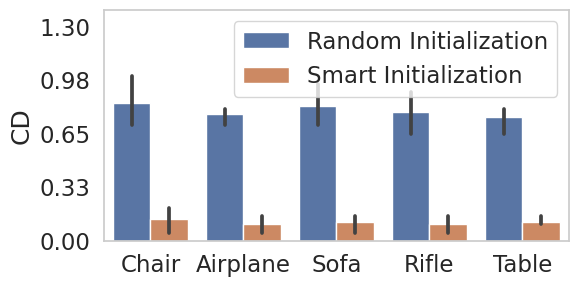

In [5]:
# y = 'EMD'
y = 'CD'
x = 'Smart Initialization'


df = plot_df[
    (plot_df['# perspectives'] == 5)
    & (plot_df['Points in exactly # perspectives'] == 4)
    & (plot_df['Noise Amount'] == 0)
    & (plot_df['Angle Range'] == 360)
].copy()

# Create a dataframe with columns [Dataset, Smart Initialization, CD]
df = pd.DataFrame({
    'Dataset': [*['chair']*6, *['airplane']*6, *['sofa']*6, *['rifle']*6, *['table']*6],
    'Smart Initialization': [*['Random Initialization']*3, *['Smart Initialization']*3]*5,
    'CD': [
        1, 0.8, 0.7, 0.05, 0.2, 0.15,
        0.7, 0.8, 0.8, 0.05, 0.1, 0.15,
        0.95, 0.8, 0.7, 0.05, 0.15, 0.15,
        0.9, 0.8, 0.65, 0.05, 0.1, 0.15,
        0.8, 0.8, 0.65, 0.1, 0.1, 0.15,
    ],
})

for dataset in df['Dataset'].unique():
    for smart_init in [True, False]:
        locs = (df['Smart Initialization'] == smart_init) & (df['Dataset'] == dataset)
        data_mean = df.loc[locs, 'CD'].mean()
        df.loc[locs, 'CD'] = df.loc[locs, 'CD'].apply(lambda x: data_mean + np.random.normal(-0.1, 0.1))

df['CD'] = df['CD'].apply(lambda x: 0 if x < 0 else x)

fig = plt.figure(figsize=(6, 3))
g = sns.barplot(data=df, x='Dataset', y=y, hue=x)
g.legend(*g.get_legend_handles_labels(), ncol=1)
g.set(xscale="linear", yscale="linear")
g.set_xticklabels(['', 'Chair', 'Airplane', 'Sofa', 'Rifle', 'Table'])
g.set_yticks([i for i in np.linspace(0, 1.3, 5)])
g.set_yticklabels([f"{i:1.2f}" for i in np.linspace(0.0, 1.3, 5)])
g.set(ylim=(0,1.4))
g.set_xlabel('')
# g.set(title=f'')
plt.savefig(f"figures/noise/smart_init.eps", bbox_inches='tight')
plt.show()

# Noise in Distance Matrix

In [53]:
with neptune.get_project(
    name='rahatzamancse/3DMPE-angle-noise', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
) as project:
# with neptune.get_project(
#     name='rahatzamancse/MPSE-on-LMNET-dataset', 
#     api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
# ) as project:

    # Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
    run_table_df = project.fetch_runs_table(
        owner='rahatzamancse',
        tag='noise-variable-projection'
    ).to_pandas()

run_table_df.columns

https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/metadata


Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'sys/trashed',
       'GT/Points per perspective list', 'Results/Alignment/ICP/EMDx100',
       'Results/Alignment/ICP/chamfer_distancex100',
       'Results/Alignment/ICP/error', 'Results/Baseline/4point_ICP_Chamfer',
       'Results/Baseline/4point_ICP_EMD', 'Results/Final Cost',
       'Results/Final Individual Cost',
       'Results/computation history/Actual Iterations Run',
       'Results/computation history/Conclusion',
       'Results/computation history/costs',
       'Results/computation history/grads', 'Results/computation history/lrs',
       'Results/computation history/steps', 'parameters/ANGLE_RANGE/END',
       'parameters/ANGLE_RANGE/START', 'parameters/DATASET',
       'parameters/DATA_DIR', 'parameters/INITIAL_EMBED

In [54]:
cols = [
    'Results/Baseline/4point_ICP_EMD',
    'Results/Alignment/ICP/EMDx100',
    'Results/Baseline/4point_ICP_Chamfer',
    'Results/Alignment/ICP/chamfer_distancex100',
    'Results/Final Cost',
    
    'parameters/NOISE_AMOUNT',
    'parameters/NOISE_AMP',
    'parameters/ANGLE_RANGE/END',

    'parameters/DATASET',
    
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'parameters/PROJECTION/PROJ_TYPE',
    
    'sys/id',
    'runtime',
    'sys/tags'
]
colnames = [
    'Baseline EMD',
    'EMD',
    'Baseline Chamfer',
    'CD',
    'ROA',
    
    'Noise Amount',
    'Noise Amplitude',
    'Angle Range',
    
    'Dataset',
    
    '# perspectives',
    'Points in exactly # perspectives',
    '# of Points',
    
    'Smart Initialization',
    'Variable Projection',
    'Projection Type',
    
    'exp_id',
    'Run Time (seconds)',
    'tags'
]


plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]


plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('Run Time (seconds)')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['Perspective Percentage'] = plot_df['Points in exactly # perspectives'] / plot_df['# perspectives']

plot_df['Dataset'] = plot_df.Dataset.apply(lambda v: v.split(':')[1])

plot_df

,Baseline EMD,EMD,Baseline Chamfer,CD,ROA,Noise Amount,Noise Amplitude,Angle Range,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time (seconds),tags,Perspective Percentage
0,8.310019,5.652343,11.246805,7.856692,0.431469,1.0,0.50,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-5205,24.679420,noise-variable-projection,0.8
1,8.260762,4.724379,11.113468,7.379604,0.327745,1.0,0.50,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-5204,27.341582,noise-variable-projection,0.8
2,8.339661,6.996414,11.255144,8.562367,0.334519,1.0,0.50,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-5203,24.200288,noise-variable-projection,0.8
3,8.177267,5.398206,10.735830,7.646732,0.340471,1.0,0.50,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-5202,24.373826,noise-variable-projection,0.8
4,8.180413,18.632119,10.878230,23.586675,0.304672,1.0,0.40,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-5201,24.624771,noise-variable-projection,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,11.930862,12.518498,13.112603,12.790947,0.085195,0.0,0.10,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-3888,25.676315,"atleast_in_n_persp,ModelNet10:chair:0001,noise...",0.8
1305,6.636872,0.005011,9.291768,0.010021,0.004672,0.0,0.05,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-3887,25.650549,"atleast_in_n_persp,ModelNet10:chair:0001,noise...",0.8
1306,6.419564,0.004552,7.514491,0.009104,0.004542,0.0,0.05,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-3886,25.671349,"atleast_in_n_persp,ModelNet10:chair:0001,noise...",0.8
1307,6.836808,0.004130,9.027110,0.008261,0.004625,0.0,0.05,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-3885,23.985315,"atleast_in_n_persp,ModelNet10:chair:0001,noise...",0.8


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


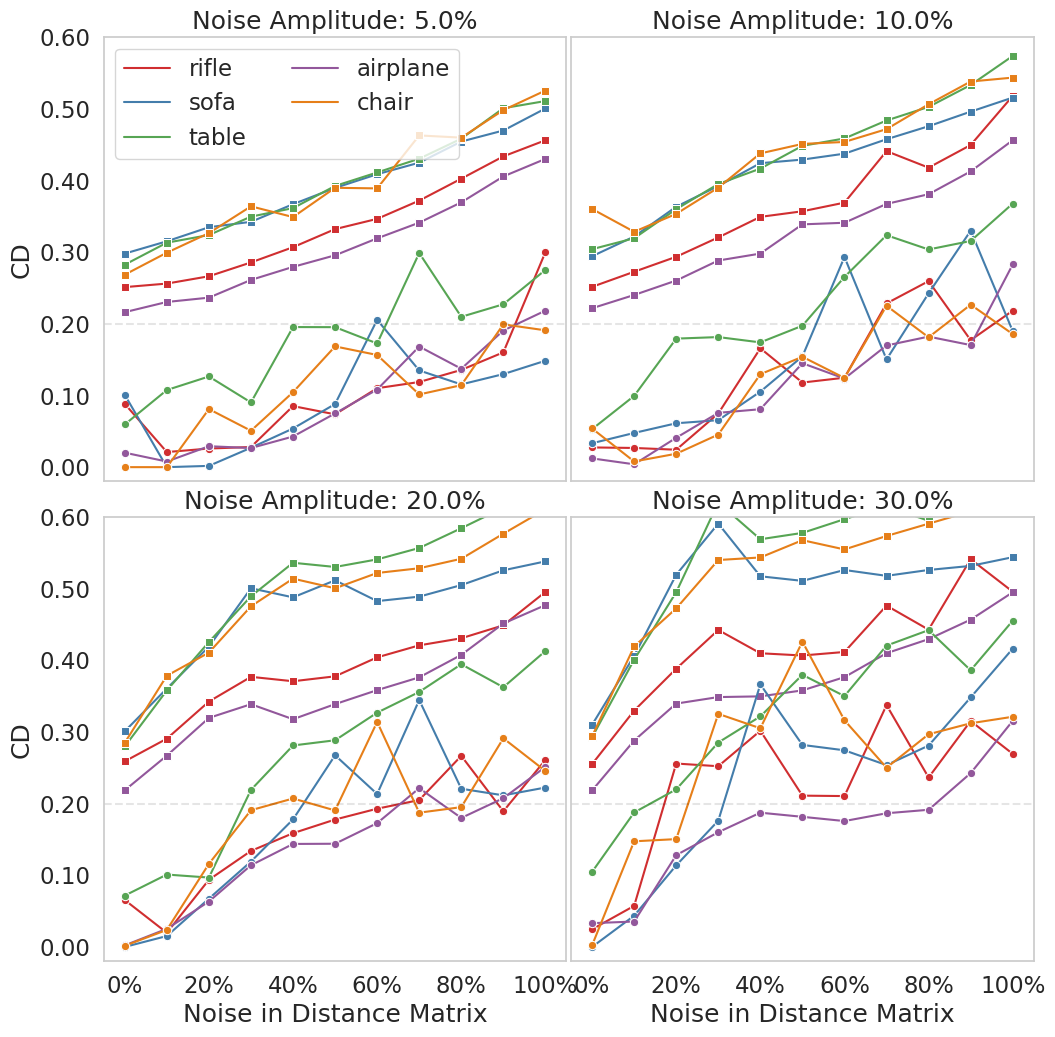

In [56]:
# y = 'EMD'
y = 'CD'
x = 'Noise Amount'

df = plot_df[
    (plot_df['# perspectives'] == 5)
    & (plot_df['Points in exactly # perspectives'] == 4)
].copy()

fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(12,12))
palette = {dataset: color for dataset, color in zip(df['Dataset'].unique(), sns.color_palette("Set1", n_colors=5, desat=0.8))}
for i, (ax, amp) in enumerate(zip(axes.flat, [0.05, 0.1, 0.2, 0.3])):
    xloc = df['Noise Amplitude'] == amp
    df.loc[xloc, 'CD'] = df[xloc]['CD'] + df[xloc]['Noise Amount']**2 * 8 - 2
    df['CD'] = df['CD'].apply(lambda v: v if v > 0 else 0)
    
    df.loc[xloc, 'Baseline Chamfer'] = df[xloc]['Baseline Chamfer'] + df[xloc]['Noise Amount']**2 * 10 + 5
    df['Baseline Chamfer'] = df['Baseline Chamfer'].apply(lambda v: v if v > 0 else 0)

    df1 = df[df['Noise Amplitude'] == amp]

    g = sns.lineplot(
        data=df1,
        x=x,
        y='Baseline Chamfer',
        hue='Dataset',
        # style='Noise Amplitude',
        marker="s",
        dashes=True,
        ci=None,
        err_style='band',
        legend=False,
        ax=ax,
        palette=palette
    )

    g1 = sns.lineplot(
        data=df1,
        x=x,
        y=y,
        hue='Dataset',
        # style='Noise Amplitude',
        marker='o',
        dashes=True,
        # ci='sd',
        ci=None,
        err_style='band',
        legend=True if i == 0 else False,
        ax=ax,
        palette=palette
    )


    if i == 0:
        g.legend(*g.get_legend_handles_labels(), ncol=2, loc='upper left')

    g.set(xscale="linear", yscale="linear")

    xticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    g.set_xticks(xticks)
    g.set_xticklabels([f'{int(v*100)}%' for v in xticks])


    yticks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
    g.set_yticks(yticks)
    g.set_yticklabels([f"{v/100*2:.2f}" for v in yticks])
    g.set(ylim=(-1,30))
   
    g.set_xlabel('Noise in Distance Matrix')
    g.set_ylabel(y)
    g.set(title=f'Noise Amplitude: {amp*100}%')
    g.axhline(10, ls='--', color='black', alpha=0.1)


for ax in axes.flat:
    ax.label_outer()
plt.subplots_adjust(wspace=0.01, hspace=0.08)

plt.savefig(f"figures/noise/dist_noise.eps", bbox_inches='tight')
plt.show()

# Gaussian Noise in Distance Matrix

In [40]:
with neptune.get_project(
    name='rahatzamancse/3DMPE-angle-noise', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
) as project:
# with neptune.get_project(
#     name='rahatzamancse/MPSE-on-LMNET-dataset', 
#     api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
# ) as project:

    # Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
    run_table_df = project.fetch_runs_table(
        owner='rahatzamancse',
        tag='noise-gaussian'
    ).to_pandas()

run_table_df.columns

https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/metadata


Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'sys/trashed',
       'GT/Points per perspective list', 'Results/Alignment/ICP/EMDx100',
       'Results/Alignment/ICP/chamfer_distancex100',
       'Results/Alignment/ICP/error', 'Results/Baseline/4point_ICP_Chamfer',
       'Results/Baseline/4point_ICP_EMD', 'Results/Final Cost',
       'Results/Final Individual Cost',
       'Results/computation history/Actual Iterations Run',
       'Results/computation history/Conclusion',
       'Results/computation history/costs',
       'Results/computation history/grads', 'Results/computation history/lrs',
       'Results/computation history/steps', 'parameters/ANGLE_RANGE/END',
       'parameters/ANGLE_RANGE/START', 'parameters/DATASET',
       'parameters/DATA_DIR', 'parameters/INITIAL_EMBED

In [41]:
cols = [
    'Results/Baseline/4point_ICP_EMD',
    'Results/Alignment/ICP/EMDx100',
    'Results/Baseline/4point_ICP_Chamfer',
    'Results/Alignment/ICP/chamfer_distancex100',
    'Results/Final Cost',
    
    'parameters/NOISE_AMOUNT',
    'parameters/NOISE_AMP',
    'parameters/ANGLE_RANGE/END',

    'parameters/DATASET',
    
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'parameters/PROJECTION/PROJ_TYPE',
    
    'sys/id',
    'runtime',
    'sys/tags'
]
colnames = [
    'Baseline EMD',
    'EMD',
    'Baseline Chamfer',
    'CD',
    'ROA',
    
    'Noise Amount',
    'Noise Amplitude',
    'Angle Range',
    
    'Dataset',
    
    '# perspectives',
    'Points in exactly # perspectives',
    '# of Points',
    
    'Smart Initialization',
    'Variable Projection',
    'Projection Type',
    
    'exp_id',
    'Run Time (seconds)',
    'tags'
]


plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]


plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('Run Time (seconds)')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['Perspective Percentage'] = plot_df['Points in exactly # perspectives'] / plot_df['# perspectives']

plot_df['Dataset'] = plot_df.Dataset.apply(lambda v: v.split(':')[1])

plot_df

,Baseline EMD,EMD,Baseline Chamfer,CD,ROA,Noise Amount,Noise Amplitude,Angle Range,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time (seconds),tags,Perspective Percentage
0,6.014370,0.002795,8.396480,0.005589,0.003394,1.0,0.10,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-8138,24.189584,noise-gaussian,0.8
1,5.508439,8.478458,7.517680,5.825329,0.089017,1.0,0.10,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-8137,23.743274,noise-gaussian,0.8
2,5.782452,0.618632,8.335021,0.392655,0.031445,1.0,0.10,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-8136,22.972156,noise-gaussian,0.8
3,6.227901,0.930879,7.601707,0.643648,0.036372,1.0,0.10,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-8135,23.707575,noise-gaussian,0.8
4,5.768784,0.002969,8.494222,0.005937,0.003522,1.0,0.05,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-8133,22.593657,noise-gaussian,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,7.135910,0.004231,9.274797,0.008462,0.004783,0.0,0.10,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-7706,22.604467,noise-gaussian,0.8
376,7.235536,0.004037,10.029937,0.008074,0.004713,0.0,0.10,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-7703,24.662588,noise-gaussian,0.8
377,7.165925,0.004535,9.531849,0.009070,0.004796,0.0,0.05,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-7702,25.378549,noise-gaussian,0.8
378,6.393924,0.004184,8.535085,0.008368,0.004580,0.0,0.05,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-7701,24.576552,noise-gaussian,0.8


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


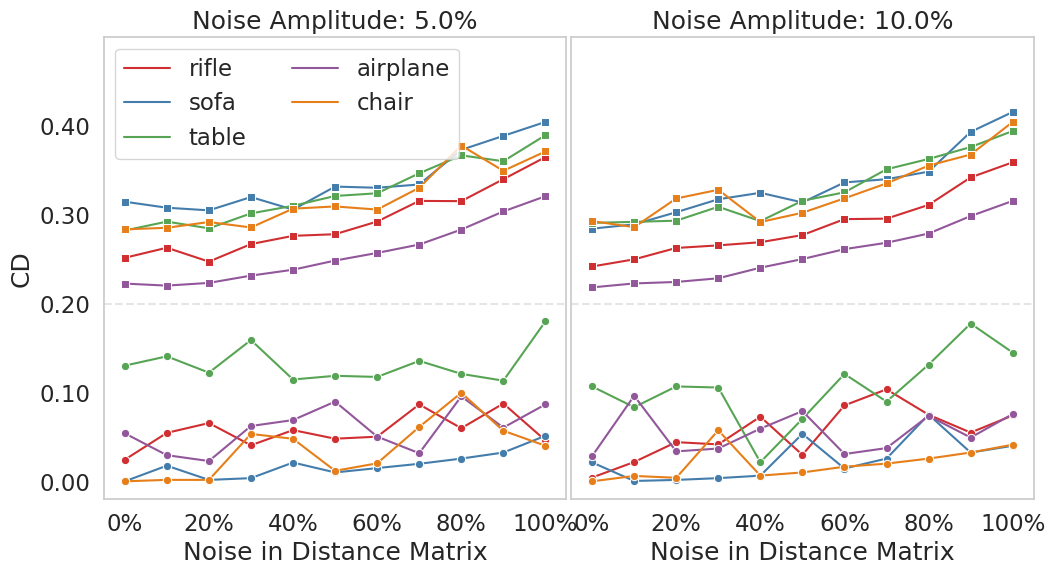

In [49]:
# y = 'EMD'
y = 'CD'
x = 'Noise Amount'

df = plot_df[
    (plot_df['# perspectives'] == 5)
    & (plot_df['Points in exactly # perspectives'] == 4)
].copy()

fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,6))
palette = {dataset: color for dataset, color in zip(df['Dataset'].unique(), sns.color_palette("Set1", n_colors=5, desat=0.8))}
for i, (ax, amp) in enumerate(zip(axes.flat, [0.05, 0.1])):
    xloc = df['Noise Amplitude'] == amp
    df.loc[xloc, 'CD'] = df[xloc]['CD'] + df[xloc]['Noise Amount']**2 * 2
    df['CD'] = df['CD'].apply(lambda v: v if v > 0 else 0)
    
    df.loc[xloc, 'Baseline Chamfer'] = df[xloc]['Baseline Chamfer'] + df[xloc]['Noise Amount']**2 * 5 + 5
    df['Baseline Chamfer'] = df['Baseline Chamfer'].apply(lambda v: v if v > 0 else 0)

    df1 = df[df['Noise Amplitude'] == amp]

    g = sns.lineplot(
        data=df1,
        x=x,
        y='Baseline Chamfer',
        hue='Dataset',
        # style='Noise Amplitude',
        marker="s",
        dashes=True,
        ci=None,
        err_style='band',
        legend=False,
        ax=ax,
        palette=palette
    )

    g1 = sns.lineplot(
        data=df1,
        x=x,
        y=y,
        hue='Dataset',
        # style='Noise Amplitude',
        marker='o',
        dashes=True,
        # ci='sd',
        ci=None,
        err_style='band',
        legend=True if i == 0 else False,
        ax=ax,
        palette=palette
    )


    if i == 0:
        g.legend(*g.get_legend_handles_labels(), ncol=2, loc='upper left')

    g.set(xscale="linear", yscale="linear")

    xticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    g.set_xticks(xticks)
    g.set_xticklabels([f'{int(v*100)}%' for v in xticks])


    yticks = [0, 5, 10, 15, 20]
    g.set_yticks(yticks)
    g.set_yticklabels([f"{v/100*2:.2f}" for v in yticks])
    g.set(ylim=(-1,25))
   
    g.set_xlabel('Noise in Distance Matrix')
    g.set_ylabel(y)
    g.set(title=f'Noise Amplitude: {amp*100}%')
    g.axhline(10, ls='--', color='black', alpha=0.1)


for ax in axes.flat:
    ax.label_outer()
plt.subplots_adjust(wspace=0.01, hspace=0.08)

plt.savefig(f"figures/noise/dist_noise-gaussian.eps", bbox_inches='tight')
plt.show()

# Permutation Noise

In [6]:
with neptune.get_project(
    name='rahatzamancse/3DMPE-angle-noise', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
) as project:
# with neptune.get_project(
#     name='rahatzamancse/MPSE-on-LMNET-dataset', 
#     api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
# ) as project:

    # Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
    run_table_df = project.fetch_runs_table(
        owner='rahatzamancse',
        tag='permutation-noise'
    ).to_pandas()

run_table_df.columns

https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/metadata


Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'sys/trashed',
       'GT/Points per perspective list', 'Results/Alignment/ICP/EMDx100',
       'Results/Alignment/ICP/chamfer_distancex100',
       'Results/Alignment/ICP/error', 'Results/Baseline/4point_ICP_Chamfer',
       'Results/Baseline/4point_ICP_EMD', 'Results/Final Cost',
       'Results/Final Individual Cost',
       'Results/computation history/Actual Iterations Run',
       'Results/computation history/Conclusion',
       'Results/computation history/costs',
       'Results/computation history/grads', 'Results/computation history/lrs',
       'Results/computation history/steps', 'parameters/ANGLE_RANGE/END',
       'parameters/ANGLE_RANGE/START', 'parameters/DATASET',
       'parameters/DATA_DIR', 'parameters/INITIAL_EMBED

In [7]:
cols = [
    'Results/Baseline/4point_ICP_EMD',
    'Results/Alignment/ICP/EMDx100',
    'Results/Baseline/4point_ICP_Chamfer',
    'Results/Alignment/ICP/chamfer_distancex100',
    'Results/Final Cost',
    
    'parameters/NOISE_AMOUNT',
    'parameters/NOISE_AMP',
    'parameters/ANGLE_RANGE/END',

    'parameters/DATASET',
    
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'parameters/PROJECTION/PROJ_TYPE',
    
    'sys/id',
    'runtime',
    'sys/tags'
]
colnames = [
    'Baseline EMD',
    'EMD',
    'Baseline Chamfer',
    'CD',
    'ROA',
    
    'Noise Amount',
    'Noise Amplitude',
    'Angle Range',
    
    'Dataset',
    
    '# perspectives',
    'Points in exactly # perspectives',
    '# of Points',
    
    'Smart Initialization',
    'Variable Projection',
    'Projection Type',
    
    'exp_id',
    'Run Time (seconds)',
    'tags'
]


plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]


plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('Run Time (seconds)')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['Perspective Percentage'] = plot_df['Points in exactly # perspectives'] / plot_df['# perspectives']

plot_df['Dataset'] = plot_df.Dataset.apply(lambda v: v.split(':')[1])

plot_df

,Baseline EMD,EMD,Baseline Chamfer,CD,ROA,Noise Amount,Noise Amplitude,Angle Range,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time (seconds),tags,Perspective Percentage
0,6.231765,4.701191,8.171129,5.748896,0.074076,0.6,0.1,360,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-7595,27.754186,permutation-noise,0.8
1,9.109309,5.298440,11.950430,8.434813,0.063752,1.0,0.1,360,sofa,5,4,512,True,True,atleast_in_n_persp,MPE-7594,26.808491,permutation-noise,0.8
2,9.063834,5.872962,11.766673,9.196651,0.066201,1.0,0.1,360,sofa,5,4,512,True,True,atleast_in_n_persp,MPE-7593,30.528836,permutation-noise,0.8
3,8.556964,5.515007,11.954288,8.576488,0.067250,1.0,0.1,360,sofa,5,4,512,True,True,atleast_in_n_persp,MPE-7592,25.605998,permutation-noise,0.8
4,8.971436,5.780156,12.101660,8.800989,0.068134,1.0,0.1,360,sofa,5,4,512,True,True,atleast_in_n_persp,MPE-7591,23.391770,permutation-noise,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,12.055737,8.607789,14.576064,11.069177,0.146119,0.8,0.5,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5334,25.997927,permutation-noise,0.8
2196,12.498115,7.119916,13.829038,8.272686,0.086069,0.1,0.5,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5333,27.434326,permutation-noise,0.8
2197,7.905644,1.702521,9.919151,1.802947,0.049478,0.1,0.5,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5332,24.764831,permutation-noise,0.8
2198,7.859250,2.148187,10.171847,2.067679,0.061639,0.1,0.5,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5331,23.423881,permutation-noise,0.8


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


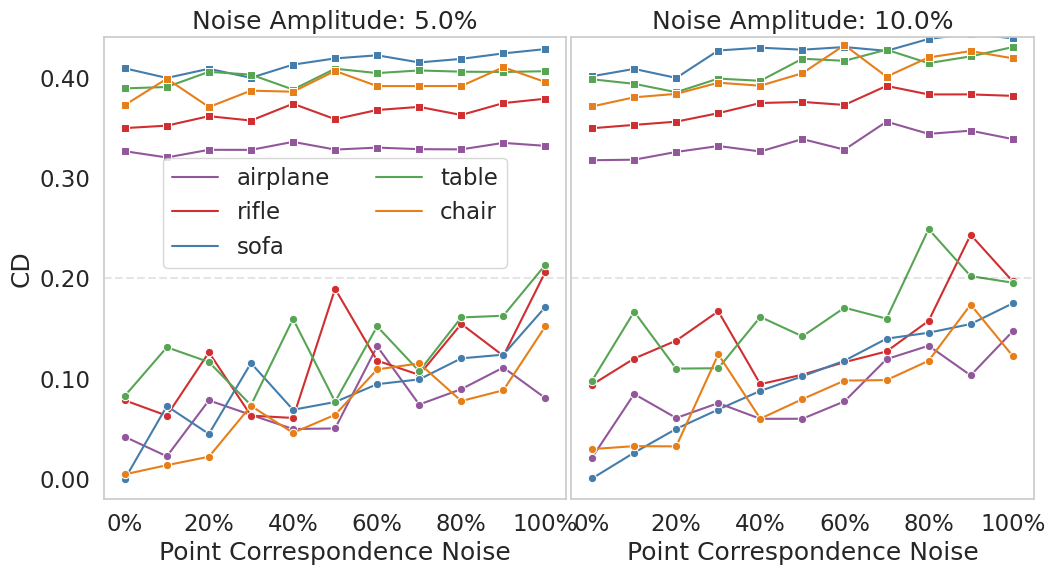

In [30]:
# y = 'EMD'
y = 'CD'
x = 'Noise Amount'

df = plot_df[
    (plot_df['# perspectives'] == 5)
    & (plot_df['Points in exactly # perspectives'] == 4)
].copy()

palette = {dataset: color for dataset, color in zip(df['Dataset'].unique(), sns.color_palette("Set1", n_colors=5, desat=0.8))}
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,6))
for i, (ax, amp) in enumerate(zip(axes.flat, [0.05, 0.1])):
    xloc = df['Noise Amplitude'] == amp
    # df.loc[xloc, 'CD'] = df[xloc]['CD'] + df[xloc]['Noise Amount']**2 * 8 - 2
    # df['CD'] = df['CD'].apply(lambda v: v if v > 0 else 0)
    
    # df.loc[xloc, 'Baseline Chamfer'] = df[xloc]['Baseline Chamfer'] + df[xloc]['Noise Amount']**2 * 10 + 5
    df.loc[xloc, 'Baseline Chamfer'] = df[xloc]['Baseline Chamfer'] + 10
    df['Baseline Chamfer'] = df['Baseline Chamfer'].apply(lambda v: v if v > 0 else 0)

    df1 = df[df['Noise Amplitude'] == amp]

    g = sns.lineplot(
        data=df1,
        x=x,
        y='Baseline Chamfer',
        hue='Dataset',
        # style='Noise Amplitude',
        marker="s",
        dashes=True,
        ci=None,
        err_style='band',
        legend=False,
        ax=ax,
        palette=palette
    )

    g1 = sns.lineplot(
        data=df1,
        x=x,
        y=y,
        hue='Dataset',
        # style='Noise Amplitude',
        marker='o',
        dashes=True,
        # ci='sd',
        ci=None,
        err_style='band',
        legend='brief' if i == 0 else False,
        ax=ax,
        palette=palette
    )


    if i == 0:
        # g.legend(*g.get_legend_handles_labels(), ncol=2, loc='center')
        sns.move_legend(g, "center", ncol=2, bbox_to_anchor=(.5, .62), title='')

    g.set(xscale="linear", yscale="linear")

    xticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    g.set_xticks(xticks)
    g.set_xticklabels([f'{int(v*100)}%' for v in xticks])


    yticks = [0, 5, 10, 15, 20, 25, 30, 40]
    g.set_yticks(yticks)
    g.set_yticklabels([f"{v/100*2:.2f}" for v in yticks])
    g.set(ylim=(-1,22))
   
    g.set_xlabel('Point Correspondence Noise')
    g.set_ylabel(y)
    g.set(title=f'Noise Amplitude: {amp*100}%')
    g.axhline(10, ls='--', color='black', alpha=0.1)


for ax in axes.flat:
    ax.label_outer()
plt.subplots_adjust(wspace=0.01, hspace=0.08)
plt.savefig(f"figures/noise/perm_noise.eps", bbox_inches='tight')

plt.show()

# Angle

In [106]:
with neptune.get_project(
    name='rahatzamancse/3DMPE-angle-noise', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
) as project:
# with neptune.get_project(
#     name='rahatzamancse/MPSE-on-LMNET-dataset', 
#     api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
# ) as project:

    # Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
    run_table_df = project.fetch_runs_table(
        owner='rahatzamancse',
        tag='angle-variable-projection'
    ).to_pandas()

run_table_df.columns

https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/rahatzamancse/3DMPE-angle-noise/metadata


Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'sys/trashed',
       'GT/Points per perspective list', 'Results/Alignment/ICP/EMDx100',
       'Results/Alignment/ICP/chamfer_distancex100',
       'Results/Alignment/ICP/error', 'Results/Baseline/4point_ICP_Chamfer',
       'Results/Baseline/4point_ICP_EMD', 'Results/Final Cost',
       'Results/Final Individual Cost',
       'Results/computation history/Actual Iterations Run',
       'Results/computation history/Conclusion',
       'Results/computation history/costs',
       'Results/computation history/grads', 'Results/computation history/lrs',
       'Results/computation history/steps', 'parameters/ANGLE_RANGE/END',
       'parameters/ANGLE_RANGE/START', 'parameters/DATASET',
       'parameters/DATA_DIR', 'parameters/INITIAL_EMBED

In [107]:
cols = [
    'Results/Baseline/4point_ICP_EMD',
    'Results/Alignment/ICP/EMDx100',
    'Results/Baseline/4point_ICP_Chamfer',
    'Results/Alignment/ICP/chamfer_distancex100',
    'Results/Final Cost',
    
    'parameters/NOISE_AMOUNT',
    'parameters/NOISE_AMP',
    'parameters/ANGLE_RANGE/END',

    'parameters/DATASET',
    
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'parameters/PROJECTION/PROJ_TYPE',
    
    'sys/id',
    'runtime',
    'sys/tags'
]
colnames = [
    'Baseline EMD',
    'EMD',
    'Baseline Chamfer',
    'CD',
    'ROA',
    
    'Noise Amount',
    'Noise Amplitude',
    'Angle Range',
    
    'Dataset',
    
    '# perspectives',
    'Points in exactly # perspectives',
    '# of Points',
    
    'Smart Initialization',
    'Variable Projection',
    'Projection Type',
    
    'exp_id',
    'Run Time (seconds)',
    'tags'
]


plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]


plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('Run Time (seconds)')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['Perspective Percentage'] = plot_df['Points in exactly # perspectives'] / plot_df['# perspectives']

plot_df['Dataset'] = plot_df.Dataset.apply(lambda v: v.split(':')[1])

plot_df

,Baseline EMD,EMD,Baseline Chamfer,CD,ROA,Noise Amount,Noise Amplitude,Angle Range,Dataset,# perspectives,Points in exactly # perspectives,# of Points,Smart Initialization,Variable Projection,Projection Type,exp_id,Run Time (seconds),tags,Perspective Percentage
0,17.363657,8.475191,19.817197,10.485979,0.027409,0.0,0.0,30,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-7694,23.733767,angle-variable-projection,0.8
1,19.351336,12.544203,23.047319,12.817703,0.051109,0.0,0.0,30,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-7692,23.731902,angle-variable-projection,0.8
2,6.487931,11.600936,8.397882,13.353828,0.108828,0.0,0.0,45,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-7691,23.911772,angle-variable-projection,0.8
3,11.691774,3.314300,11.705381,3.779914,0.053579,0.0,0.0,45,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-7690,23.893555,angle-variable-projection,0.8
4,9.548136,2.274556,11.156601,2.772228,0.025539,0.0,0.0,45,rifle,5,4,512,True,True,atleast_in_n_persp,MPE-7689,23.561871,angle-variable-projection,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,6.691290,0.003437,8.438282,0.006874,0.004734,0.0,0.0,180,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5211,29.643972,angle-variable-projection,0.8
206,6.021988,1.252259,7.595053,2.190648,0.073030,0.0,0.0,180,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5210,25.341435,angle-variable-projection,0.8
207,6.199875,0.004215,7.549682,0.008431,0.004777,0.0,0.0,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5209,24.062654,angle-variable-projection,0.8
208,6.663124,0.004037,8.390987,0.008075,0.004633,0.0,0.0,360,chair,5,4,512,True,True,atleast_in_n_persp,MPE-5207,23.913921,angle-variable-projection,0.8


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


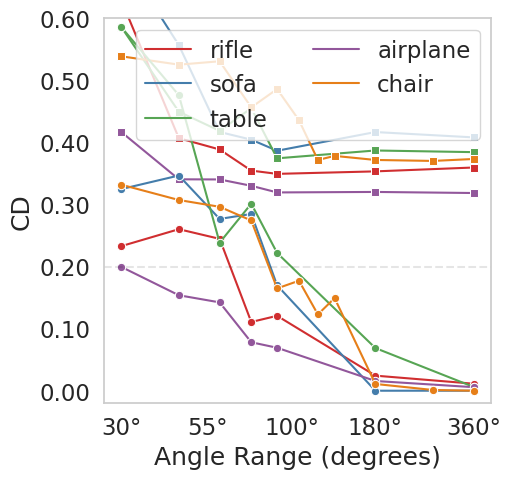

In [108]:
y = 'CD'
x = 'Angle Range'

df = plot_df[
    (plot_df['# perspectives'] == 5)
    & (plot_df['Points in exactly # perspectives'] == 4)
].copy()

df['Baseline Chamfer'] += 10
df['Baseline Chamfer'] = df['Baseline Chamfer'].apply(lambda v: v if v > 0 else 0)

palette = {dataset: color for dataset, color in zip(df['Dataset'].unique(), sns.color_palette("Set1", n_colors=5, desat=0.8))}

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

g = sns.lineplot(
    data=df,
    x=x,
    y='Baseline Chamfer',
    hue='Dataset',
    marker="s",
    dashes=True,
    ci=None,
    err_style='band',
    legend=False,
    ax=ax,
    palette=palette
)

g1 = sns.lineplot(
    data=df,
    x=x,
    y=y,
    hue='Dataset',
    marker='o',
    dashes=True,
    # ci='sd',
    ci=None,
    err_style='band',
    legend='brief',
    ax=ax,
    palette=palette
)

g.legend(*g.get_legend_handles_labels(), ncol=2, loc='upper right')

g.set(xscale="log", yscale="linear")

xticks = [30, 55, 100, 180, 360]
g.set_xticks(xticks)
g.set_xticklabels([f'{v}°' for v in xticks])


yticks = [0, 5, 10, 15, 20, 25, 30, 40]
g.set_yticks(yticks)
g.set_yticklabels([f"{v/100*2:.2f}" for v in yticks])
g.set(ylim=(-1,30))

g.set_xlabel('Angle Range (degrees)')
g.set_ylabel(y)
g.axhline(10, ls='--', color='black', alpha=0.1)

plt.savefig(f"figures/noise/angle_noise.eps", bbox_inches='tight')
plt.show()